In [ ]:
from google.colab.patches import cv2_imshow 
from google.colab import drive 
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ImageAnalysis 영상 분석 기법




패턴인식은 대표적으로 분류classification와 군집화clustering을 쓴다

- 분류 

일반적으로 교사학습supervised learning이라고 부름

미리 학습데이터를 클래스로 분류하고 분류함수를 계산 -> 새로운 데이터 분류

대부분의 패턴인식이나 머신러닝은 교사학습을 기반으로 둠

베이츠 추론, 최대 우도, 최대 사후, 퍼지로직, 결정트리, 인공신경망등 방법이 있음

- 군집화

비 교사학습unsupervised learning

입력된 학습데이터를 클래스 분류 없이 특성 분석 -> 특성으로 군집 분류 -> 새로운 데이터를 기존 군집 중 하나로 분류




# K-mean Clustering

영상의 수치적인 특성을 분석하여 픽셀들을 특성에 맞게 군집화시키는 알고리즘

비 교사분류에 속한 주어진 데이터를 k개의 클러스터로 묶는 알고리즘

각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 동작

- k-mean 군집화 기법 알고리즘

군집 개수 k는 사전에 알려져있다고 가정함
1. 초기화

군집 개수 k 설정

각 군집의 초기 중심값 설정(랜덤으로)

2. 데이터 분배

모든 데이터를 각 군집 중심값과 차이값을 이용하여 분배

차이값이 가장 작은 군집으로 데이터 분배(군집의 원소로 넣음)

\

3. 새로운 군집의 중심 구하기

새로 구성된 각 군집 집합으로 새로 군집의 중십값 구함

4. 수렴 여부 조사

새로운 군집과 이전 군집의 변화 측정

각 군집마다 차이값을 더하고 변화 없으면 더이상 수렴하지 않으므로 분류 종료

차이값이 미리 설정한 임계값보다 크면 2단계부터 재실행

\

OpenCV에서는 K-mean 군집화 함수를 지원함 


K-mean 군집화 구현 

2차원 특징 벡터 공간에서 랜덤한 학습데이터를 2그룹으로 분할


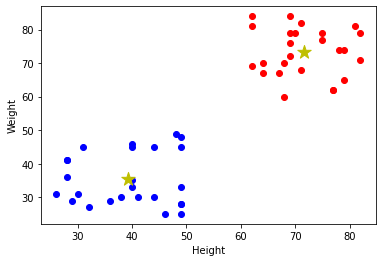

In [ ]:
#25 X 2 크기의 배열 생성 -> 범위안의 랜덤 정수 생성 -> 학습데이터 설정
X = np.random.randint(25,50,(25,2)) # 25~49 사이의 정수를 25행 2열의 배열에 채움
Y = np.random.randint(60,85,(25,2))

Z = np.vstack((X,Y))# 두 배열 연결. 배열을 세로방향 순서대로 쌓음

# 배열의 값을 정수에서 실수로 변경 
Z = np.float32(Z)

# 기준을 정의, kmeans() 적용
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) # 지정된 오차범위?(epsilon = 1.0)도달 시 알고리즘 10회 반복 후 중지 
# ret=각 지점에서 중심까지 거리제곱합,label=0과1로 표시된 레이블 배열,center=군집 중심 배열
ret,label,center=cv2.kmeans(Z,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS) # 군집개수=2, 군집 초기위치 랜덤 설정 

# 군집 나눔
A = Z[label.ravel()==0] # 군집 레이블이 0인 데이터만 A 배열에 넣기
B = Z[label.ravel()==1] # 군집 레이블이 1인 데이터만 B 배열에 넣기

plt.scatter(A[:,0],A[:,1], c='b') # A배열의 1,2번째 열값을 blue로 표시
plt.scatter(B[:,0],B[:,1],c = 'r') # B배열의 1,2번째 열값을 red로 표시
plt.scatter(center[:,0],center[:,1],s = 200,c = 'y', marker = '*') # 군집 중심값을 크기 200, yellow, *로 표시
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

K-mean 군집화 구현 

실제 영상을 색상영역별로 분리

군집의 개수가 커질수록 더 세밀하고 원본에 가깝게 출력됨

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
original image


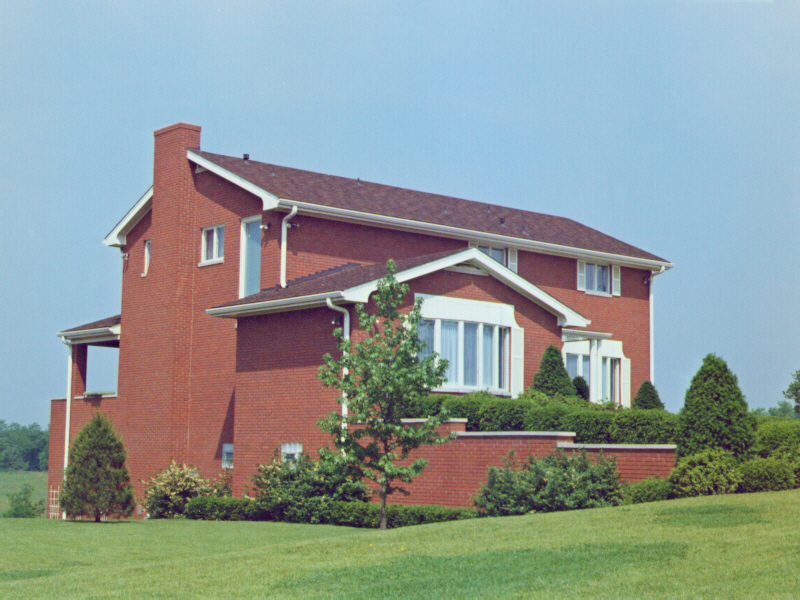

Clustering into 2 clusters
(480000, 3)


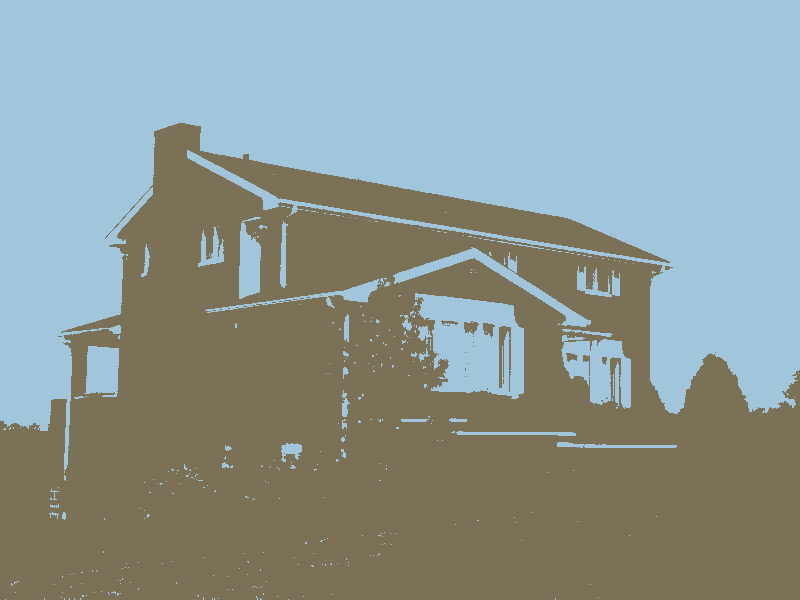

Clustering into 10 clusters
(480000, 3)


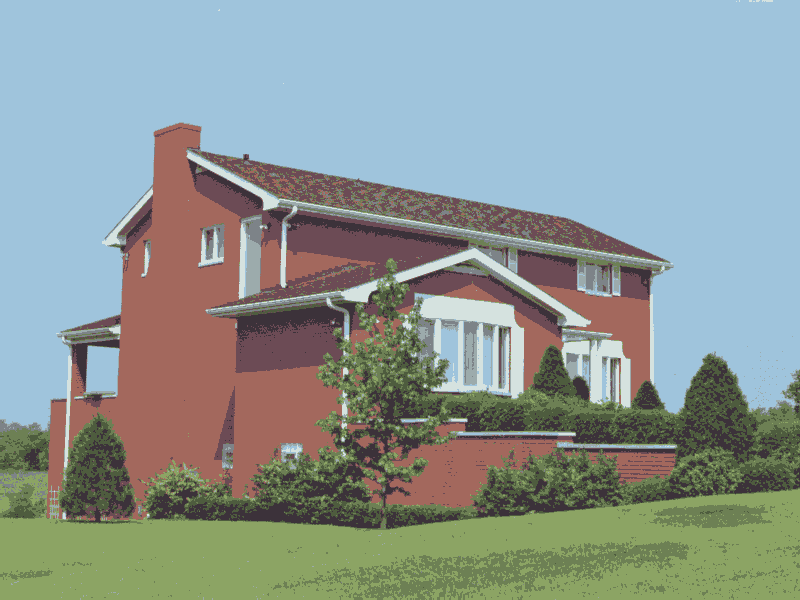

In [ ]:
drive.mount('/content/gdrive') 
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/home3.jpg')

def Kmean(K, img): # 군집개수를 인자로 받음
  Z = img.reshape((-1,3))#영상의 구조 변경. -1은 형식지정 안한다는 뜻, 열 개수3(영역 개수)
  print(Z.shape)

  # 배열의 값을 정수에서 실수로 변경 
  Z = np.float32(Z)

  # 기준 정의, kmeans() 적용
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  #ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_PP_CENTERS)

  # center 배열의 값을 uint8 형식으로 되돌림 (픽셀로 표현해야 함으로), and make original image
  center = np.uint8(center)
  # 각 픽셀별로 label배열에 해당하는 픽셀(중심값)으로 변경 -> res에 입력. label배열을 평평(row vector)하게 재조정
  res = center[label.flatten()]

  #3채널로 재조정
  res2 = res.reshape((img.shape)) # res는 (480000,3)모양. 영상 출력위해 (600,800,3)으로 만듬 
  return res2

print("original image")
cv2_imshow(img)  
print("Clustering into 2 clusters")
cv2_imshow(Kmean(2, img))
print("Clustering into 10 clusters")
cv2_imshow(Kmean(10, img))

# Region Labrling 영역 레이블링

군집된 영역들을 독립된 개체로 레이블링 시키는 기법

영역이란 각 픽셀들이 서로 다른 픽셀들과 연결되어있는 픽셀들의 집합을 의미,

영상에서 픽셀간의 연결성을 기준으로 픽셀을 그룹화한 것

영역 레이블링은 픽셀을 군집화하여 같은 군집내의 픽셀은 모두 다른 레이블값 설정

영역 레이블링은 반복적 알고리즘과 순차적 알고리즘으로 나눌 수 있다

\

- 반복적 알고리즘 Recursive Algorithm

영상 안에 포함된 영역은 1, 배경의 픽셀은 0의 픽셀값을 갖는다 가정하에

1. 영상을 상->하, 좌->우로 스캔하며 레이블되지 않은 1인 픽셀에 레이블값 할당
2. 그 주변 픽셀을 스캔하며 1번의 레이블값으로 레이블 , 값을 0으로 바꿔 중복 방지
3. 더이상 연결된 1을 가진 픽셀이 없을때까지 2번 반복
4. 새로운 영역으로 가 1번 단계부터 반복
5. 영상 안에 더이상 1을 가진 픽셀이 없으면 레이블링 종료

연결 픽셀을 찾는 과정에서 주로 재귀함수를 이용하여 구현

영상이 지나치게 크면 빈번한 재귀호출로 overflow가 발생할 수 있음

\

- 순차적 알고리즘 Sequential Algorithm

순차적 알고리즘은 반복적 알고리즘과 다르게 한 번에 행 2개를 써서 레이블링함

현재 픽셀 기준 상하좌우 4개 이웃의 레이블을 고려하여 현재 레이블 결정(이론적으로)

실제론 상, 좌 2개 픽셀만 참고

1. 영상을 좌->우, 상->하로 스캔
2. 현재 픽셀이 0이 아닌 경우 상, 좌 2개 이웃의 레이블을 기준으로 현재 레이블값 정함

  둘 다 값이 같거나, 둘 중 하나만 레이블 가지면 그 레이블 값으로 설정
  
  둘의 값이 다르면 큰 번호의 레이블이 작은 번호의 레이블을 가리키게 등가 테이블 조정 
3. 등가 테이블의 번호와 레이블이 일치하지 않을 경우 등가테이블 수정
4. 수정된 등가 테이블에 맞춰 레이블 영상 수정
5. 등가 테이블을 레이블이 순차적으로 증가하게 재정렬
6. 정렬된 최종 등가 테이블에 맞게 영상 수정

\

OpenCV에서 connectedComponents()함수로 영역레이블링 지원함
  



영역 레이블링 구현

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
number of labels: 7


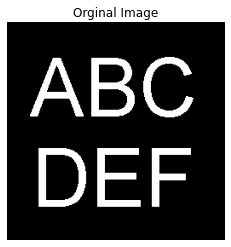

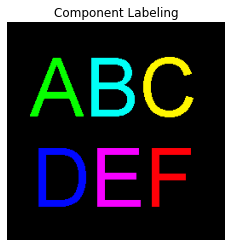

In [ ]:
drive.mount('/content/gdrive') 
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/abcdef.bmp')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # color -> gray 변경

# 입력 영상에서 흰색 (255) 픽셀 영역 레이블링 (4 이웃 연산법)
num_labels, labels = cv2.connectedComponents(gray_img,4) # 레이블링 개수와 번호. 이진화 영상에 4이웃을 이용하여 순차적 레이블링함
print('number of labels:', num_labels)
  
# 각 영역마다 다른 색(레이블)을 갖도록 조정
label_H = np.uint8(179*labels/np.max(labels))# 영역을 서로 다른 색으로 채우려고 Hue색상 사용
blank = 255*np.ones_like(label_H)
labeled_img = cv2.merge([label_H, blank, blank])# hue값만 영역 레이블에 따라 서로 다르게 설정. (256,256,3)
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2RGB)# 색상 형식 -> BGR
labeled_img[label_H==0] = 0# 배경 레이블(0) -> 검은색

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))# 원본
plt.axis("off")
plt.title("Orginal Image")
plt.show()
    
plt.imshow(labeled_img)# 컴포넌트 레이블링된 영상
plt.axis('off')
plt.title("Component Labeling")
plt.show()

# Contour Tracing 외곽선 추정 기법

군집된 영역의 외곽선 추출

영상이 영역별로 레이블링 된 상태에서 각 영역에 대한 외곽선region contour을 추출할 수 있다

외곽선 추척으로 영역 경계선을 따라 이동하는데, 보통 8방향 연결성을 고려하여 추적 진행함

- 외곽선 추적 알고리즘
1. 영상을 상->하, 좌->우로 스캔하며 특정 레이블값을 가진 픽셀 찾음
2. 찾으면 시작점s과 현재 픽셀c를 같게 설정, 초기 외곽선추적 진행 방향은 b=1 설정
3. 이웃에 s값 픽셀이 있으면 해당 픽셀은 c로 설정 후 b = b-2
4. 모든 방향에 객체 픽셀이 없으면 추적 종료
5. s=c && b=1 종료 조건 만족할 때까지 2~4번 반복

\

OpenCV에서 findContours()함수 제공

외곽선 추정 알고리즘 구하기

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Segmented image


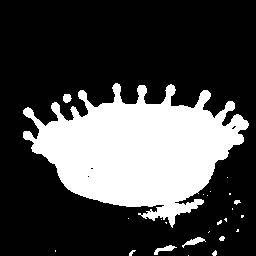

Contour tracing image


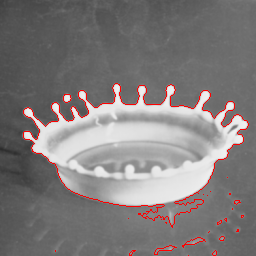

In [ ]:
drive.mount('/content/gdrive') 
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/milkdrop.bmp')

# color영상을 gray영상으로 만들기
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#threshold를 이용하여 binary image로 변환
ret, thresh = cv2.threshold(gray_img,127,255,0)

#contours는 point의 list형태.
#hierachy는 contours line의 계층 구조
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
#영상에 외곽선 그리기
image = cv2.drawContours(img,contours, -1, (0,0,255), 1)
print("Segmented image")
cv2_imshow(thresh)
print("Contour tracing image")
cv2_imshow(image)